# number of "obs" that go into the calculation of anomalies
# land & sea ice modify these numbers (+clouds for emulator)
# Fig. 2 in CESM storms paper

In [1]:
import os
from tqdm import tqdm
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset, MFDataset
import numba as nb
import time as timing
from numba import njit 
from math import sin, cos, sqrt, atan2, radians
from geopy.distance import distance
import seawater as sw
import matplotlib

In [2]:
#---
# savepath
#---

savepath     = '/global/cfs/cdirs/m4003/cnissen/Plots/CESM_storms/composites_1997_2018_subtract_clim_first/num_obs/'
# check existence of paths
if not os.path.exists(savepath):
    print ('Created '+savepath)
    os.makedirs(savepath)
    
savepath2     = savepath+'eps/'
# check existence of paths
if not os.path.exists(savepath2):
    print ('Created '+savepath2)
    os.makedirs(savepath2)
    

Created /global/cfs/cdirs/m4003/cnissen/Plots/CESM_storms/composites_1997_2018_subtract_clim_first/num_obs/eps/


In [4]:
#---
# get the numbers for each month, LOW RES FULL FIELD
#---

dist_threshold = 1000
years = np.arange(1997,2018+1,1)
path1 = '/global/cfs/cdirs/m4003/cnissen/CESM_anomalies_STORM_PAPER_subtract_clim_first/count_obs_in_anomalies/'

count_storms = 0
file1 = 'Composite_anomalies_within_'+str(dist_threshold)+'km_of_storm_center_at_noon'+\
                                       '_'+str(years[0])+'_'+str(years[-1])+'_subtract_clim_first_COUNT_OBS.nc'
# anomaly of vari
ff  = xr.open_dataset(path1+file1)
aux_count       = ff['totChl_storm_anomaly4_count'].values 
aux_count_max   = ff['totChl_storm_anomaly4_count_max'].values 
month_storm     = ff['month_storm'].values  # at min. SLP
days_storm      = ff['days_storm'].values 
lon_storm       = ff['lon_storm'].values # at min. SLP
lat_storm       = ff['lat_storm'].values # at min. SLP
min_slp         = ff['min_min_slp_storm'].values # Minimum sea level pressure during the existence of each storm (based on min. SLP at noon)
ff.close()
count_storms = aux_count_max.shape[0]
    
# full composites
data_count = aux_count
data_count_jan = aux_count[np.where(month_storm==1)[0]]
data_count_feb = aux_count[np.where(month_storm==2)[0]]
data_count_mar = aux_count[np.where(month_storm==3)[0]]
data_count_apr = aux_count[np.where(month_storm==4)[0]]
data_count_may = aux_count[np.where(month_storm==5)[0]]
data_count_jun = aux_count[np.where(month_storm==6)[0]]
data_count_jul = aux_count[np.where(month_storm==7)[0]]
data_count_aug = aux_count[np.where(month_storm==8)[0]]
data_count_sep = aux_count[np.where(month_storm==9)[0]]
data_count_oct = aux_count[np.where(month_storm==10)[0]]
data_count_nov = aux_count[np.where(month_storm==11)[0]]
data_count_dec = aux_count[np.where(month_storm==12)[0]]
# max number of obs
data_count_max = aux_count_max
data_count_max_jan = aux_count_max[np.where(month_storm==1)[0]]
data_count_max_feb = aux_count_max[np.where(month_storm==2)[0]]
data_count_max_mar = aux_count_max[np.where(month_storm==3)[0]]
data_count_max_apr = aux_count_max[np.where(month_storm==4)[0]]
data_count_max_may = aux_count_max[np.where(month_storm==5)[0]]
data_count_max_jun = aux_count_max[np.where(month_storm==6)[0]]
data_count_max_jul = aux_count_max[np.where(month_storm==7)[0]]
data_count_max_aug = aux_count_max[np.where(month_storm==8)[0]]
data_count_max_sep = aux_count_max[np.where(month_storm==9)[0]]
data_count_max_oct = aux_count_max[np.where(month_storm==10)[0]]
data_count_max_nov = aux_count_max[np.where(month_storm==11)[0]]
data_count_max_dec = aux_count_max[np.where(month_storm==12)[0]]

del aux_count,aux_count_max

print('count_storms',count_storms)
print('ALL STORMS:',data_count.shape,data_count_max.shape)
print()
print('Jan:',data_count_jan.shape,data_count_max_jan.shape)
print('Feb:',data_count_feb.shape,data_count_max_feb.shape)
print('Mar:',data_count_mar.shape,data_count_max_mar.shape)
print('Apr:',data_count_apr.shape,data_count_max_apr.shape)
print('May:',data_count_may.shape,data_count_max_may.shape)
print('Jun:',data_count_jun.shape,data_count_max_jun.shape)
print('Jul:',data_count_jul.shape,data_count_max_jul.shape)
print('Aug:',data_count_aug.shape,data_count_max_aug.shape)
print('Sep:',data_count_sep.shape,data_count_max_sep.shape)
print('Oct:',data_count_oct.shape,data_count_max_oct.shape)
print('Nov:',data_count_nov.shape,data_count_max_nov.shape)
print('Dec:',data_count_dec.shape,data_count_max_dec.shape)



count_storms 9615
ALL STORMS: (9615, 21, 21) (9615,)

Jan: (719, 21, 21) (719,)
Feb: (712, 21, 21) (712,)
Mar: (776, 21, 21) (776,)
Apr: (836, 21, 21) (836,)
May: (898, 21, 21) (898,)
Jun: (874, 21, 21) (874,)
Jul: (895, 21, 21) (895,)
Aug: (881, 21, 21) (881,)
Sep: (801, 21, 21) (801,)
Oct: (813, 21, 21) (813,)
Nov: (700, 21, 21) (700,)
Dec: (710, 21, 21) (710,)


In [5]:
#---
# get the numbers for each month, HIGH RES FULL FIELD
#---

dist_threshold = 1000
years = np.arange(1997,2018+1,1)
path1 = '/global/cfs/cdirs/m4003/cnissen/CESM_anomalies_STORM_PAPER_subtract_clim_first/count_obs_in_anomalies/'

count_storms = 0
file1 = 'Composite_anomalies_within_'+str(dist_threshold)+'km_of_storm_center_at_noon'+\
                                       '_hr_'+str(years[0])+'_'+str(years[-1])+'_subtract_clim_first_COUNT_OBS.nc'

# anomaly of vari
ff  = xr.open_dataset(path1+file1)
aux_count       = ff['totChl_hr_storm_anomaly4_count'].values 
aux_count_max   = ff['totChl_hr_storm_anomaly4_count_max'].values 
month_storm     = ff['month_storm'].values  # at min. SLP
days_storm      = ff['days_storm'].values 
lon_storm       = ff['lon_storm'].values # at min. SLP
lat_storm       = ff['lat_storm'].values # at min. SLP
min_slp         = ff['min_min_slp_storm'].values # Minimum sea level pressure during the existence of each storm (based on min. SLP at noon)
ff.close()
count_storms = aux_count_max.shape[0]
    
# full composites
data_count_hr = aux_count
data_count_hr_jan = aux_count[np.where(month_storm==1)[0]]
data_count_hr_feb = aux_count[np.where(month_storm==2)[0]]
data_count_hr_mar = aux_count[np.where(month_storm==3)[0]]
data_count_hr_apr = aux_count[np.where(month_storm==4)[0]]
data_count_hr_may = aux_count[np.where(month_storm==5)[0]]
data_count_hr_jun = aux_count[np.where(month_storm==6)[0]]
data_count_hr_jul = aux_count[np.where(month_storm==7)[0]]
data_count_hr_aug = aux_count[np.where(month_storm==8)[0]]
data_count_hr_sep = aux_count[np.where(month_storm==9)[0]]
data_count_hr_oct = aux_count[np.where(month_storm==10)[0]]
data_count_hr_nov = aux_count[np.where(month_storm==11)[0]]
data_count_hr_dec = aux_count[np.where(month_storm==12)[0]]
# max number of obs
data_count_max_hr = aux_count_max
data_count_max_hr_jan = aux_count_max[np.where(month_storm==1)[0]]
data_count_max_hr_feb = aux_count_max[np.where(month_storm==2)[0]]
data_count_max_hr_mar = aux_count_max[np.where(month_storm==3)[0]]
data_count_max_hr_apr = aux_count_max[np.where(month_storm==4)[0]]
data_count_max_hr_may = aux_count_max[np.where(month_storm==5)[0]]
data_count_max_hr_jun = aux_count_max[np.where(month_storm==6)[0]]
data_count_max_hr_jul = aux_count_max[np.where(month_storm==7)[0]]
data_count_max_hr_aug = aux_count_max[np.where(month_storm==8)[0]]
data_count_max_hr_sep = aux_count_max[np.where(month_storm==9)[0]]
data_count_max_hr_oct = aux_count_max[np.where(month_storm==10)[0]]
data_count_max_hr_nov = aux_count_max[np.where(month_storm==11)[0]]
data_count_max_hr_dec = aux_count_max[np.where(month_storm==12)[0]]
del aux_count,aux_count_max

print('count_storms',count_storms)
print('ALL STORMS:',data_count_hr.shape,data_count_max_hr.shape)
print()
print('Jan:',data_count_hr_jan.shape,data_count_max_hr_jan.shape)
print('Feb:',data_count_hr_feb.shape,data_count_max_hr_feb.shape)
print('Mar:',data_count_hr_mar.shape,data_count_max_hr_mar.shape)
print('Apr:',data_count_hr_apr.shape,data_count_max_hr_apr.shape)
print('May:',data_count_hr_may.shape,data_count_max_hr_may.shape)
print('Jun:',data_count_hr_jun.shape,data_count_max_hr_jun.shape)
print('Jul:',data_count_hr_jul.shape,data_count_max_hr_jul.shape)
print('Aug:',data_count_hr_aug.shape,data_count_max_hr_aug.shape)
print('Sep:',data_count_hr_sep.shape,data_count_max_hr_sep.shape)
print('Oct:',data_count_hr_oct.shape,data_count_max_hr_oct.shape)
print('Nov:',data_count_hr_nov.shape,data_count_max_hr_nov.shape)
print('Dec:',data_count_hr_dec.shape,data_count_max_hr_dec.shape)



count_storms 9615
ALL STORMS: (9615, 21, 21) (9615,)

Jan: (719, 21, 21) (719,)
Feb: (712, 21, 21) (712,)
Mar: (776, 21, 21) (776,)
Apr: (836, 21, 21) (836,)
May: (898, 21, 21) (898,)
Jun: (874, 21, 21) (874,)
Jul: (895, 21, 21) (895,)
Aug: (881, 21, 21) (881,)
Sep: (801, 21, 21) (801,)
Oct: (813, 21, 21) (813,)
Nov: (700, 21, 21) (700,)
Dec: (710, 21, 21) (710,)


In [6]:
#---
# get the numbers for each month, LOW RES EMULATOR
#---

dist_threshold = 1000
years = np.arange(1997,2018+1,1)
path1 = '/global/cfs/cdirs/m4003/cnissen/CESM_anomalies_STORM_PAPER_subtract_clim_first/count_obs_in_anomalies/'

count_storms = 0
file1 = 'Composite_anomalies_within_'+str(dist_threshold)+'km_of_storm_center_at_noon'+\
                                       '_emulator_'+str(years[0])+'_'+str(years[-1])+'_subtract_clim_first_full_field_clim_COUNT_OBS.nc'

# anomaly of vari
ff  = xr.open_dataset(path1+file1)
aux_count       = ff['totChl_emulator_storm_anomaly4_count'].values 
aux_count_max   = ff['totChl_emulator_storm_anomaly4_count_max'].values 
month_storm     = ff['month_storm'].values  # at min. SLP
days_storm      = ff['days_storm'].values 
lon_storm       = ff['lon_storm'].values # at min. SLP
lat_storm       = ff['lat_storm'].values # at min. SLP
min_slp         = ff['min_min_slp_storm'].values # Minimum sea level pressure during the existence of each storm (based on min. SLP at noon)
ff.close()
count_storms = aux_count_max.shape[0]
    
# full composites
data_count_em = aux_count
data_count_em_jan = aux_count[np.where(month_storm==1)[0]]
data_count_em_feb = aux_count[np.where(month_storm==2)[0]]
data_count_em_mar = aux_count[np.where(month_storm==3)[0]]
data_count_em_apr = aux_count[np.where(month_storm==4)[0]]
data_count_em_may = aux_count[np.where(month_storm==5)[0]]
data_count_em_jun = aux_count[np.where(month_storm==6)[0]]
data_count_em_jul = aux_count[np.where(month_storm==7)[0]]
data_count_em_aug = aux_count[np.where(month_storm==8)[0]]
data_count_em_sep = aux_count[np.where(month_storm==9)[0]]
data_count_em_oct = aux_count[np.where(month_storm==10)[0]]
data_count_em_nov = aux_count[np.where(month_storm==11)[0]]
data_count_em_dec = aux_count[np.where(month_storm==12)[0]]
# max number of obs
data_count_max_em = aux_count_max
data_count_max_em_jan = aux_count_max[np.where(month_storm==1)[0]]
data_count_max_em_feb = aux_count_max[np.where(month_storm==2)[0]]
data_count_max_em_mar = aux_count_max[np.where(month_storm==3)[0]]
data_count_max_em_apr = aux_count_max[np.where(month_storm==4)[0]]
data_count_max_em_may = aux_count_max[np.where(month_storm==5)[0]]
data_count_max_em_jun = aux_count_max[np.where(month_storm==6)[0]]
data_count_max_em_jul = aux_count_max[np.where(month_storm==7)[0]]
data_count_max_em_aug = aux_count_max[np.where(month_storm==8)[0]]
data_count_max_em_sep = aux_count_max[np.where(month_storm==9)[0]]
data_count_max_em_oct = aux_count_max[np.where(month_storm==10)[0]]
data_count_max_em_nov = aux_count_max[np.where(month_storm==11)[0]]
data_count_max_em_dec = aux_count_max[np.where(month_storm==12)[0]]
del aux_count,aux_count_max

print('count_storms',count_storms)
print('ALL STORMS:',data_count_em.shape,data_count_max_em.shape)
print()
print('Jan:',data_count_em_jan.shape,data_count_max_em_jan.shape)
print('Feb:',data_count_em_feb.shape,data_count_max_em_feb.shape)
print('Mar:',data_count_em_mar.shape,data_count_max_em_mar.shape)
print('Apr:',data_count_em_apr.shape,data_count_max_em_apr.shape)
print('May:',data_count_em_may.shape,data_count_max_em_may.shape)
print('Jun:',data_count_em_jun.shape,data_count_max_em_jun.shape)
print('Jul:',data_count_em_jul.shape,data_count_max_em_jul.shape)
print('Aug:',data_count_em_aug.shape,data_count_max_em_aug.shape)
print('Sep:',data_count_em_sep.shape,data_count_max_em_sep.shape)
print('Oct:',data_count_em_oct.shape,data_count_max_em_oct.shape)
print('Nov:',data_count_em_nov.shape,data_count_max_em_nov.shape)
print('Dec:',data_count_em_dec.shape,data_count_max_em_dec.shape)



count_storms 9615
ALL STORMS: (9615, 21, 21) (9615,)

Jan: (719, 21, 21) (719,)
Feb: (712, 21, 21) (712,)
Mar: (776, 21, 21) (776,)
Apr: (836, 21, 21) (836,)
May: (898, 21, 21) (898,)
Jun: (874, 21, 21) (874,)
Jul: (895, 21, 21) (895,)
Aug: (881, 21, 21) (881,)
Sep: (801, 21, 21) (801,)
Oct: (813, 21, 21) (813,)
Nov: (700, 21, 21) (700,)
Dec: (710, 21, 21) (710,)


mean EACH MONTH (LOW RES, full): [28.13860321 33.35422516 33.79232788 37.91790009 34.30001831 28.6311264
 22.81105804 18.99067688 14.69594574 14.78533173 17.92563629 21.48718262]
mean EACH MONTH (HIGH RES, full): [27.4083786  32.5973587  33.11207581 37.15369415 33.6602478  28.08937836
 22.27876282 18.45933533 14.17739868 14.23490906 17.32961273 20.90969086]
mean EACH MONTH (LOW RES, emulator): [98.37530386 97.90225554 97.56066942 97.51777768 97.4973495  97.27935123
 97.16093707 96.66549802 96.63111949 97.50954652 98.49787664 98.69871628]
mean ALL YEAR: 74.50483


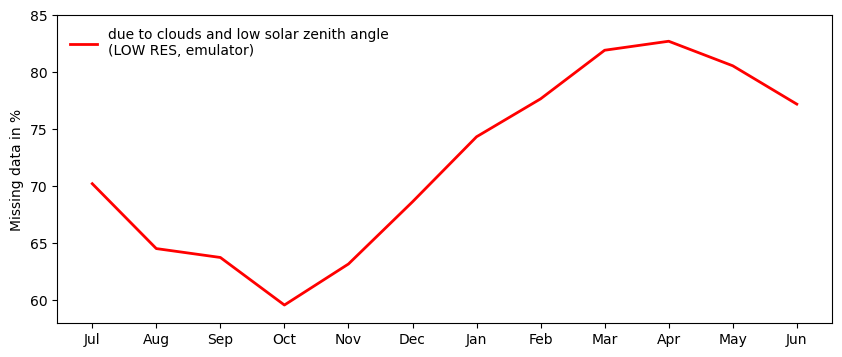

DIFFERENCE LOW vs HIGH RES: [0.73022461 0.75686646 0.68025208 0.76420593 0.63977051 0.54174805
 0.53229523 0.53134155 0.51854706 0.55042267 0.59602356 0.57749176]


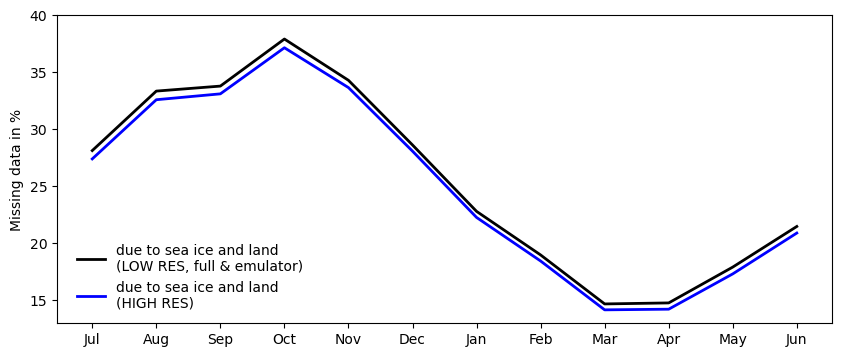

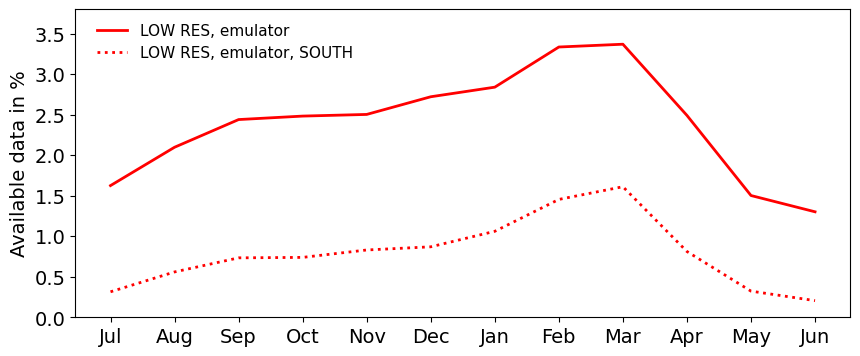

DIFFERENCE LOW vs HIGH RES: [0.73022461 0.75686646 0.68025208 0.76420593 0.63977051 0.54174805
 0.53229523 0.53134155 0.51854706 0.55042267 0.59602356 0.57749176]


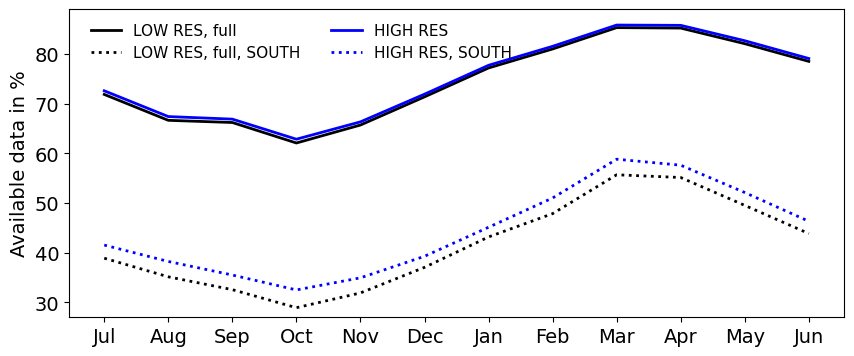

In [7]:
#---
# make an example plot
#----

def reorder_months(data):
    data2 = np.copy(data)
    data2[0:6] = data[6:]
    data2[6:] = data[0:6]
    return data2

def get_monthly_data_av(data_count,data_count_max):
    data_count_all     = np.nansum(data_count,axis=0)
    data_count_all_rel = 100*data_count_all/np.nansum(data_count_max)
    data_count_all_rel[data_count_all_rel==0] = np.nan
    data_avg = np.nanmean(data_count_all_rel.transpose()[11:,:]) # northern part of composite
    return data_avg

def get_monthly_data_av_south(data_count,data_count_max):
    data_count_all     = np.nansum(data_count,axis=0)
    data_count_all_rel = 100*data_count_all/np.nansum(data_count_max)
    data_count_all_rel[data_count_all_rel==0] = np.nan
    data_avg = np.nanmean(data_count_all_rel.transpose()[0:11,:]) # northern part of composite
    return data_avg


#----
# get average for the NORTHERN part
#----

# LOW RES, full field
data_av_lr = np.zeros([12])
data_av_lr[0] = get_monthly_data_av(data_count_jan,data_count_max_jan)
data_av_lr[1] = get_monthly_data_av(data_count_feb,data_count_max_feb)
data_av_lr[2] = get_monthly_data_av(data_count_mar,data_count_max_mar)
data_av_lr[3] = get_monthly_data_av(data_count_apr,data_count_max_apr)
data_av_lr[4] = get_monthly_data_av(data_count_may,data_count_max_may)
data_av_lr[5] = get_monthly_data_av(data_count_jun,data_count_max_jun)
data_av_lr[6] = get_monthly_data_av(data_count_jul,data_count_max_jul)
data_av_lr[7] = get_monthly_data_av(data_count_aug,data_count_max_aug)
data_av_lr[8] = get_monthly_data_av(data_count_sep,data_count_max_sep)
data_av_lr[9] = get_monthly_data_av(data_count_oct,data_count_max_oct)
data_av_lr[10] = get_monthly_data_av(data_count_nov,data_count_max_nov)
data_av_lr[11] = get_monthly_data_av(data_count_dec,data_count_max_dec)

# HIGH RES, full field
data_av_hr = np.zeros([12])
data_av_hr[0] = get_monthly_data_av(data_count_hr_jan,data_count_max_hr_jan)
data_av_hr[1] = get_monthly_data_av(data_count_hr_feb,data_count_max_hr_feb)
data_av_hr[2] = get_monthly_data_av(data_count_hr_mar,data_count_max_hr_mar)
data_av_hr[3] = get_monthly_data_av(data_count_hr_apr,data_count_max_hr_apr)
data_av_hr[4] = get_monthly_data_av(data_count_hr_may,data_count_max_hr_may)
data_av_hr[5] = get_monthly_data_av(data_count_hr_jun,data_count_max_hr_jun)
data_av_hr[6] = get_monthly_data_av(data_count_hr_jul,data_count_max_hr_jul)
data_av_hr[7] = get_monthly_data_av(data_count_hr_aug,data_count_max_hr_aug)
data_av_hr[8] = get_monthly_data_av(data_count_hr_sep,data_count_max_hr_sep)
data_av_hr[9] = get_monthly_data_av(data_count_hr_oct,data_count_max_hr_oct)
data_av_hr[10] = get_monthly_data_av(data_count_hr_nov,data_count_max_hr_nov)
data_av_hr[11] = get_monthly_data_av(data_count_hr_dec,data_count_max_hr_dec)

# LOW RES, emulator
data_av_em = np.zeros([12])
data_av_em[0] = get_monthly_data_av(data_count_em_jan,data_count_max_em_jan)
data_av_em[1] = get_monthly_data_av(data_count_em_feb,data_count_max_em_feb)
data_av_em[2] = get_monthly_data_av(data_count_em_mar,data_count_max_em_mar)
data_av_em[3] = get_monthly_data_av(data_count_em_apr,data_count_max_em_apr)
data_av_em[4] = get_monthly_data_av(data_count_em_may,data_count_max_em_may)
data_av_em[5] = get_monthly_data_av(data_count_em_jun,data_count_max_em_jun)
data_av_em[6] = get_monthly_data_av(data_count_em_jul,data_count_max_em_jul)
data_av_em[7] = get_monthly_data_av(data_count_em_aug,data_count_max_em_aug)
data_av_em[8] = get_monthly_data_av(data_count_em_sep,data_count_max_em_sep)
data_av_em[9] = get_monthly_data_av(data_count_em_oct,data_count_max_em_oct)
data_av_em[10] = get_monthly_data_av(data_count_em_nov,data_count_max_em_nov)
data_av_em[11] = get_monthly_data_av(data_count_em_dec,data_count_max_em_dec)


#----
# get average for the SOUTHERN part
#----

# LOW RES, full field
data_av_lr2 = np.zeros([12])
data_av_lr2[0] = get_monthly_data_av_south(data_count_jan,data_count_max_jan)
data_av_lr2[1] = get_monthly_data_av_south(data_count_feb,data_count_max_feb)
data_av_lr2[2] = get_monthly_data_av_south(data_count_mar,data_count_max_mar)
data_av_lr2[3] = get_monthly_data_av_south(data_count_apr,data_count_max_apr)
data_av_lr2[4] = get_monthly_data_av_south(data_count_may,data_count_max_may)
data_av_lr2[5] = get_monthly_data_av_south(data_count_jun,data_count_max_jun)
data_av_lr2[6] = get_monthly_data_av_south(data_count_jul,data_count_max_jul)
data_av_lr2[7] = get_monthly_data_av_south(data_count_aug,data_count_max_aug)
data_av_lr2[8] = get_monthly_data_av_south(data_count_sep,data_count_max_sep)
data_av_lr2[9] = get_monthly_data_av_south(data_count_oct,data_count_max_oct)
data_av_lr2[10] = get_monthly_data_av_south(data_count_nov,data_count_max_nov)
data_av_lr2[11] = get_monthly_data_av_south(data_count_dec,data_count_max_dec)

# HIGH RES, full field
data_av_hr2 = np.zeros([12])
data_av_hr2[0] = get_monthly_data_av_south(data_count_hr_jan,data_count_max_hr_jan)
data_av_hr2[1] = get_monthly_data_av_south(data_count_hr_feb,data_count_max_hr_feb)
data_av_hr2[2] = get_monthly_data_av_south(data_count_hr_mar,data_count_max_hr_mar)
data_av_hr2[3] = get_monthly_data_av_south(data_count_hr_apr,data_count_max_hr_apr)
data_av_hr2[4] = get_monthly_data_av_south(data_count_hr_may,data_count_max_hr_may)
data_av_hr2[5] = get_monthly_data_av_south(data_count_hr_jun,data_count_max_hr_jun)
data_av_hr2[6] = get_monthly_data_av_south(data_count_hr_jul,data_count_max_hr_jul)
data_av_hr2[7] = get_monthly_data_av_south(data_count_hr_aug,data_count_max_hr_aug)
data_av_hr2[8] = get_monthly_data_av_south(data_count_hr_sep,data_count_max_hr_sep)
data_av_hr2[9] = get_monthly_data_av_south(data_count_hr_oct,data_count_max_hr_oct)
data_av_hr2[10] = get_monthly_data_av_south(data_count_hr_nov,data_count_max_hr_nov)
data_av_hr2[11] = get_monthly_data_av_south(data_count_hr_dec,data_count_max_hr_dec)

# LOW RES, emulator
data_av_em2 = np.zeros([12])
data_av_em2[0] = get_monthly_data_av_south(data_count_em_jan,data_count_max_em_jan)
data_av_em2[1] = get_monthly_data_av_south(data_count_em_feb,data_count_max_em_feb)
data_av_em2[2] = get_monthly_data_av_south(data_count_em_mar,data_count_max_em_mar)
data_av_em2[3] = get_monthly_data_av_south(data_count_em_apr,data_count_max_em_apr)
data_av_em2[4] = get_monthly_data_av_south(data_count_em_may,data_count_max_em_may)
data_av_em2[5] = get_monthly_data_av_south(data_count_em_jun,data_count_max_em_jun)
data_av_em2[6] = get_monthly_data_av_south(data_count_em_jul,data_count_max_em_jul)
data_av_em2[7] = get_monthly_data_av_south(data_count_em_aug,data_count_max_em_aug)
data_av_em2[8] = get_monthly_data_av_south(data_count_em_sep,data_count_max_em_sep)
data_av_em2[9] = get_monthly_data_av_south(data_count_em_oct,data_count_max_em_oct)
data_av_em2[10] = get_monthly_data_av_south(data_count_em_nov,data_count_max_em_nov)
data_av_em2[11] = get_monthly_data_av_south(data_count_em_dec,data_count_max_em_dec)

print('mean EACH MONTH (LOW RES, full):',reorder_months(100-data_av_lr))
print('mean EACH MONTH (HIGH RES, full):',reorder_months(100-data_av_hr))
print('mean EACH MONTH (LOW RES, emulator):',reorder_months(100-data_av_em))

data_count_all     = np.nansum(data_count,axis=0)
data_count_all_rel = 100*data_count_all/np.nansum(data_count_max)
data_count_all_rel[data_count_all_rel==0] = np.nan
print('mean ALL YEAR:',np.nanmean(data_count_all_rel.transpose()[11:,:]))

months = ['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun']
save_plots = True


fig = plt.figure(figsize=(10,4))
plt.plot(reorder_months(100-data_av_em)-reorder_months(100-data_av_lr),'r',linewidth=2,label='due to clouds and low solar zenith angle\n(LOW RES, emulator)')
#plt.plot(reorder_months(100-data_av_em),'k:',linewidth=2,label='due to clouds and low solar zenith angle (LOW RES, emulator)')
plt.xticks(np.arange(0,12),months)
plt.ylabel('Missing data in %')
plt.ylim((58,85))
plt.legend(frameon=False)
if save_plots:
    dpicnt = 200
    filename = 'Seasonality_missing_data_due_to_clouds_and_low_solar_angle_EMULATOR_north.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
plt.show()

fig = plt.figure(figsize=(10,4))
#plt.plot(100-data_av_lr,'k',linewidth=2,label='due to sea ice and land (LOW RES)')
print('DIFFERENCE LOW vs HIGH RES:',reorder_months(100-data_av_lr)-reorder_months(100-data_av_hr))
plt.plot(reorder_months(100-data_av_lr),'k',linewidth=2,label='due to sea ice and land\n(LOW RES, full & emulator)')
plt.plot(reorder_months(100-data_av_hr),'b',linewidth=2,label='due to sea ice and land\n(HIGH RES)')
#plt.plot(reorder_months(100-data_av_em),'r',linewidth=2,label='due to clouds and low solar zenith angle (LOW RES, emulator)')
plt.xticks(np.arange(0,12),months)
plt.ylabel('Missing data in %')
plt.ylim((13,40))
#plt.legend(frameon=False,markerfirst=True)
plt.legend(loc='upper left',bbox_to_anchor=(0.01,0.3),frameon=False,\
               ncol=1,fancybox=False,shadow=False,prop={'size':10})
if save_plots:
    dpicnt = 200
    filename = 'Seasonality_missing_data_due_to_ice_and_land_LOW_RES_vs_HIGH_res_north.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
plt.show()



#
# This separation is not 100% clean: 
#    By simply subtracting em from lr and assuming that the remainder is due to clouds and solar angle, I probably underestimte their importance: 
#    Some locations that are missing due to sea ice might have already been missing due to clouds or the low solar angle!
#    I think this separation is more misleading than helpful!
#




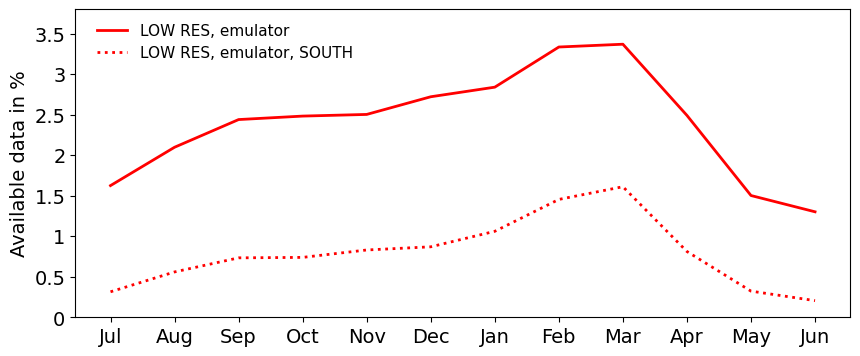

DIFFERENCE LOW vs HIGH RES: [0.73022461 0.75686646 0.68025208 0.76420593 0.63977051 0.54174805
 0.53229523 0.53134155 0.51854706 0.55042267 0.59602356 0.57749176]


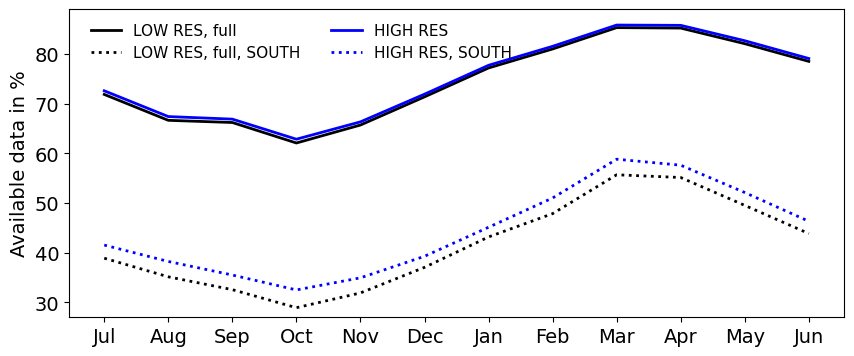

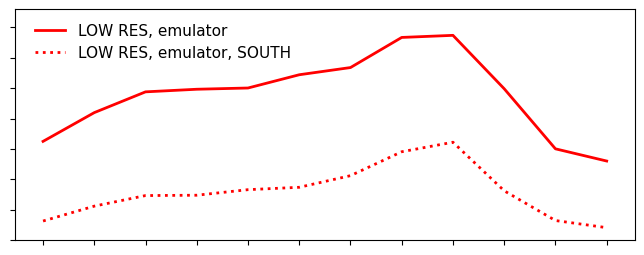

DIFFERENCE LOW vs HIGH RES: [0.73022461 0.75686646 0.68025208 0.76420593 0.63977051 0.54174805
 0.53229523 0.53134155 0.51854706 0.55042267 0.59602356 0.57749176]


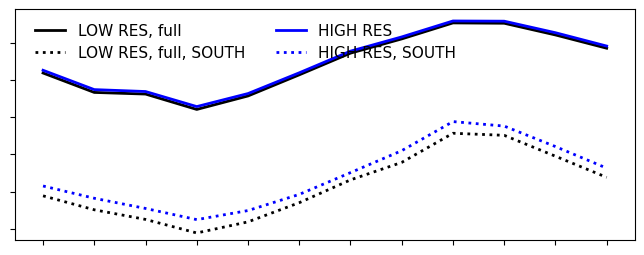

In [24]:

#----
# DATA AVAILABILITY
#----
fs = 14

fig = plt.figure(figsize=(10,4))
plt.plot(reorder_months(data_av_em),'r',linewidth=2,label='LOW RES, emulator')
plt.plot(reorder_months(data_av_em2),'r:',linewidth=2,label='LOW RES, emulator, SOUTH')
#plt.plot(reorder_months(100-data_av_em),'k:',linewidth=2,label='due to clouds and low solar zenith angle (LOW RES, emulator)')
plt.xticks(np.arange(0,12),months)
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5],[0,0.5,1,1.5,2,2.5,3,3.5])
plt.ylabel('Available data in %',fontsize=fs)
plt.ylim((0,3.8))
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(loc='upper left',bbox_to_anchor=(0.01,1),frameon=False,\
               ncol=1,fancybox=False,shadow=False,prop={'size':11})
if save_plots:
    dpicnt = 200
    filename = 'Seasonality_data_availability_EMULATOR.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
plt.show()

fig = plt.figure(figsize=(10,4))
#plt.plot(100-data_av_lr,'k',linewidth=2,label='due to sea ice and land (LOW RES)')
print('DIFFERENCE LOW vs HIGH RES:',reorder_months(100-data_av_lr)-reorder_months(100-data_av_hr))
plt.plot(reorder_months(data_av_lr),'k',linewidth=2,label='LOW RES, full')
plt.plot(reorder_months(data_av_lr2),'k:',linewidth=2,label='LOW RES, full, SOUTH')
plt.plot(reorder_months(data_av_hr),'b',linewidth=2,label='HIGH RES')
plt.plot(reorder_months(data_av_hr2),'b:',linewidth=2,label='HIGH RES, SOUTH')
#plt.plot(reorder_months(100-data_av_em),'r',linewidth=2,label='due to clouds and low solar zenith angle (LOW RES, emulator)')
plt.xticks(np.arange(0,12),months)
plt.yticks([30,40,50,60,70,80],[30,40,50,60,70,80])
plt.ylabel('Available data in %',fontsize=fs)
plt.ylim((27,89))
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.legend(frameon=False,markerfirst=True)
plt.legend(loc='upper left',bbox_to_anchor=(0.01,1),frameon=False,\
               ncol=2,fancybox=False,shadow=False,prop={'size':11})
if save_plots:
    dpicnt = 200
    filename = 'Seasonality_data_availability_LOW_RES_vs_HIGH_res.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
plt.show()


plot_eps = True
if plot_eps:
    fig = plt.figure(figsize=(8,3))
    plt.plot(reorder_months(data_av_em),'r',linewidth=2,label='LOW RES, emulator')
    plt.plot(reorder_months(data_av_em2),'r:',linewidth=2,label='LOW RES, emulator, SOUTH')
    #plt.plot(reorder_months(100-data_av_em),'k:',linewidth=2,label='due to clouds and low solar zenith angle (LOW RES, emulator)')
    plt.xticks(np.arange(0,12),[])
    plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5],[])
    plt.ylim((0,3.8))
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.legend(loc='upper left',bbox_to_anchor=(0.01,1),frameon=False,\
                   ncol=1,fancybox=False,shadow=False,prop={'size':11})
    if save_plots:
        dpicnt = 200
        filename = 'Seasonality_data_availability_EMULATOR.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)
    plt.show()

    fig = plt.figure(figsize=(8,3))
    #plt.plot(100-data_av_lr,'k',linewidth=2,label='due to sea ice and land (LOW RES)')
    print('DIFFERENCE LOW vs HIGH RES:',reorder_months(100-data_av_lr)-reorder_months(100-data_av_hr))
    plt.plot(reorder_months(data_av_lr),'k',linewidth=2,label='LOW RES, full')
    plt.plot(reorder_months(data_av_lr2),'k:',linewidth=2,label='LOW RES, full, SOUTH')
    plt.plot(reorder_months(data_av_hr),'b',linewidth=2,label='HIGH RES')
    plt.plot(reorder_months(data_av_hr2),'b:',linewidth=2,label='HIGH RES, SOUTH')
    #plt.plot(reorder_months(100-data_av_em),'r',linewidth=2,label='due to clouds and low solar zenith angle (LOW RES, emulator)')
    plt.xticks(np.arange(0,12),[])
    plt.yticks([30,40,50,60,70,80],[])
    plt.ylim((27,89))
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    #plt.legend(frameon=False,markerfirst=True)
    plt.legend(loc='upper left',bbox_to_anchor=(0.01,1),frameon=False,\
                   ncol=2,fancybox=False,shadow=False,prop={'size':11})
    if save_plots:
        dpicnt = 200
        filename = 'Seasonality_data_availability_LOW_RES_vs_HIGH_res.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)
    plt.show()
    
    

DIFFERENCE LOW vs HIGH RES: [0.73022461 0.75686646 0.68025208 0.76420593 0.63977051 0.54174805
 0.53229523 0.53134155 0.51854706 0.55042267 0.59602356 0.57749176]


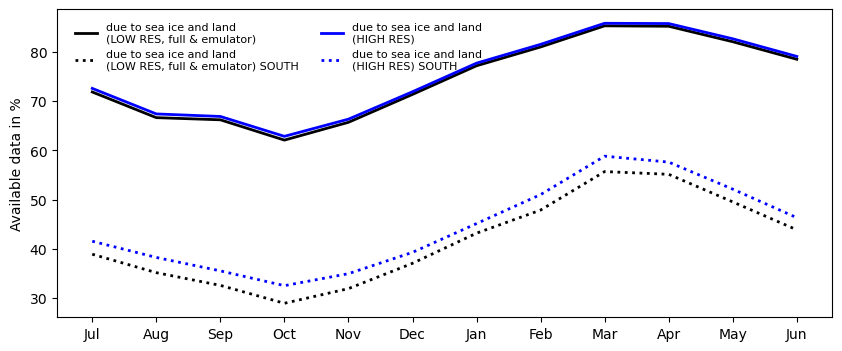

In [8]:

fig = plt.figure(figsize=(10,4))
#plt.plot(100-data_av_lr,'k',linewidth=2,label='due to sea ice and land (LOW RES)')
print('DIFFERENCE LOW vs HIGH RES:',reorder_months(100-data_av_lr)-reorder_months(100-data_av_hr))
plt.plot(reorder_months(data_av_lr),'k',linewidth=2,label='due to sea ice and land\n(LOW RES, full & emulator)')
plt.plot(reorder_months(data_av_lr2),'k:',linewidth=2,label='due to sea ice and land\n(LOW RES, full & emulator) SOUTH')
plt.plot(reorder_months(data_av_hr),'b',linewidth=2,label='due to sea ice and land\n(HIGH RES)')
plt.plot(reorder_months(data_av_hr2),'b:',linewidth=2,label='due to sea ice and land\n(HIGH RES) SOUTH')
#plt.plot(reorder_months(100-data_av_em),'r',linewidth=2,label='due to clouds and low solar zenith angle (LOW RES, emulator)')
plt.xticks(np.arange(0,12),months)
plt.ylabel('Available data in %')
#plt.ylim((13,40))
#plt.legend(frameon=False,markerfirst=True)
plt.legend(loc='upper left',bbox_to_anchor=(0.01,0.99),frameon=False,\
               ncol=2,fancybox=False,shadow=False,prop={'size':8})
if save_plots:
    dpicnt = 200
    filename = 'Seasonality_data_availability_LOW_RES_vs_HIGH_res.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
plt.show()


Apr min/max: 2.907425 99.974495
mean (north): 14.785332


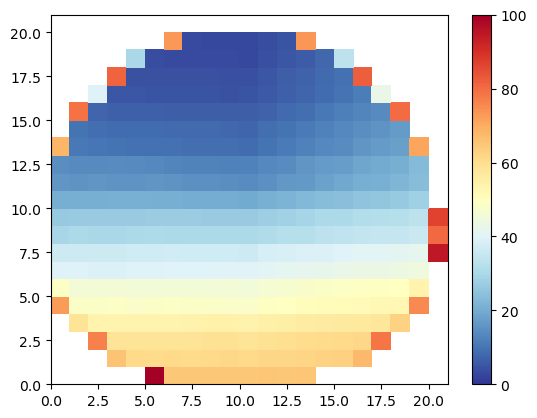

Sep min/max: 12.284538 99.50752
mean (north): 33.792328


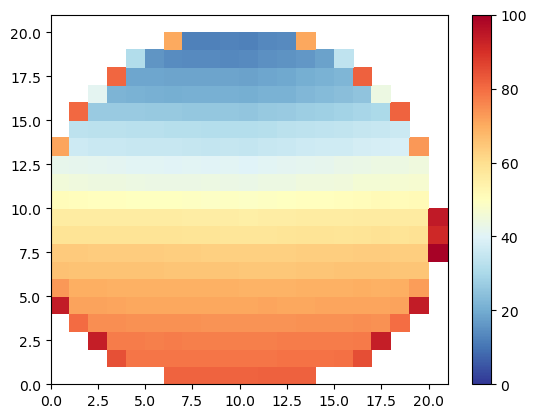

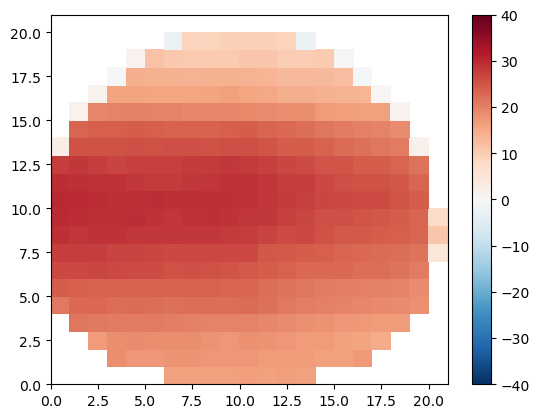

In [11]:

# JAN
data_count_all     = np.nansum(data_count_apr,axis=0)
data_count_all_rel = 100*data_count_all/np.nansum(data_count_max_apr)
data_count_all_rel[data_count_all_rel==0] = np.nan
data_count_all_rel = 100-data_count_all_rel
data_count_all_rel1 = np.copy(data_count_all_rel)
print('Apr min/max:',np.nanmin(data_count_all_rel),np.nanmax(data_count_all_rel))
print('mean (north):',np.nanmean(data_count_all_rel.transpose()[11:,:]))

plt.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.show()

# JUL
data_count_all     = np.nansum(data_count_sep,axis=0)
data_count_all_rel = 100*data_count_all/np.nansum(data_count_max_sep)
data_count_all_rel[data_count_all_rel==0] = np.nan
data_count_all_rel = 100-data_count_all_rel
data_count_all_rel2 = np.copy(data_count_all_rel)
print('Sep min/max:',np.nanmin(data_count_all_rel),np.nanmax(data_count_all_rel))
print('mean (north):',np.nanmean(data_count_all_rel.transpose()[11:,:]))

plt.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.show()

plt.pcolor(data_count_all_rel2.transpose()-data_count_all_rel1.transpose(),vmin=-40,vmax=40,cmap=plt.cm.RdBu_r)
plt.colorbar()
plt.show()
    

4.0


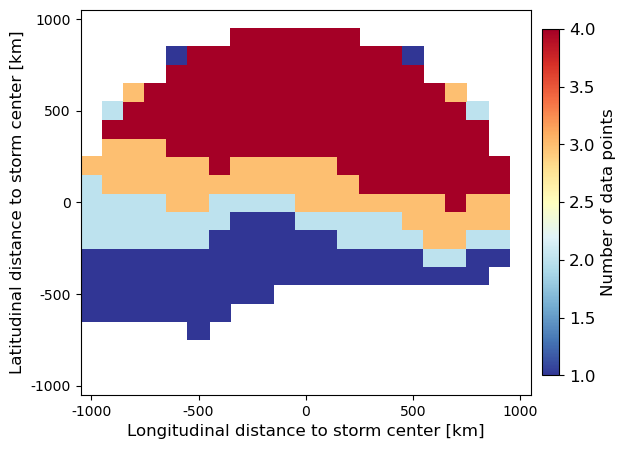

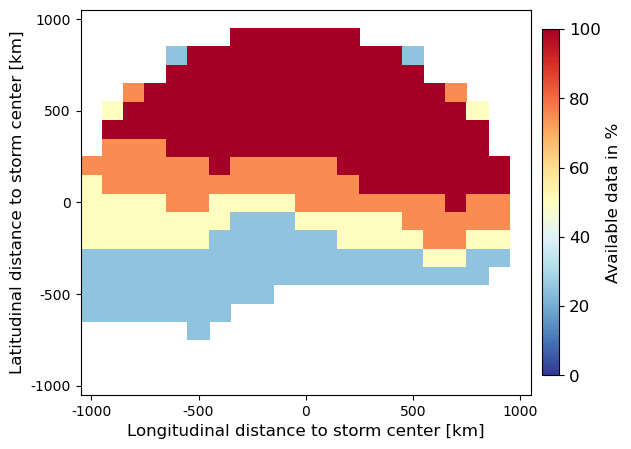

In [12]:
#----
# TEST plot (plot a single storm)
#----

# choose a storm
ss = 112

dpicnt = 100
fs = 12

res    = 100
x_bins = np.arange(-1000,1000+res,res)
y_bins = np.arange(-1000,1000+res,res)

xticks = np.arange(0,len(x_bins))
xticks = [(x+0.5) for x in xticks]
xlabel_string = 'Longitudinal distance to storm center [km]'
ylabel_string = 'Latitudinal distance to storm center [km]'

print(data_count_max[ss])

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor(data_count[ss,:,:].transpose(),vmin=1,vmax=data_count_max[ss],cmap=plt.cm.RdYlBu_r)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02)#,ticks=cticks)
cbar.set_label('Number of data points',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  
ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)
plt.show()

#---
# relative data coverage
#---

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor(100*data_count[ss,:,:].transpose()/data_count_max[ss],vmin=0,vmax=100,cmap=plt.cm.RdYlBu_r)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02)#,ticks=cticks)
cbar.set_label('Available data in %',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)    
ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)
plt.show()


(21, 21) 0.0 40782.0
(21, 21) 0.0022594784 92.14605


/tmp/ipykernel_1296869/1641089724.py:35: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


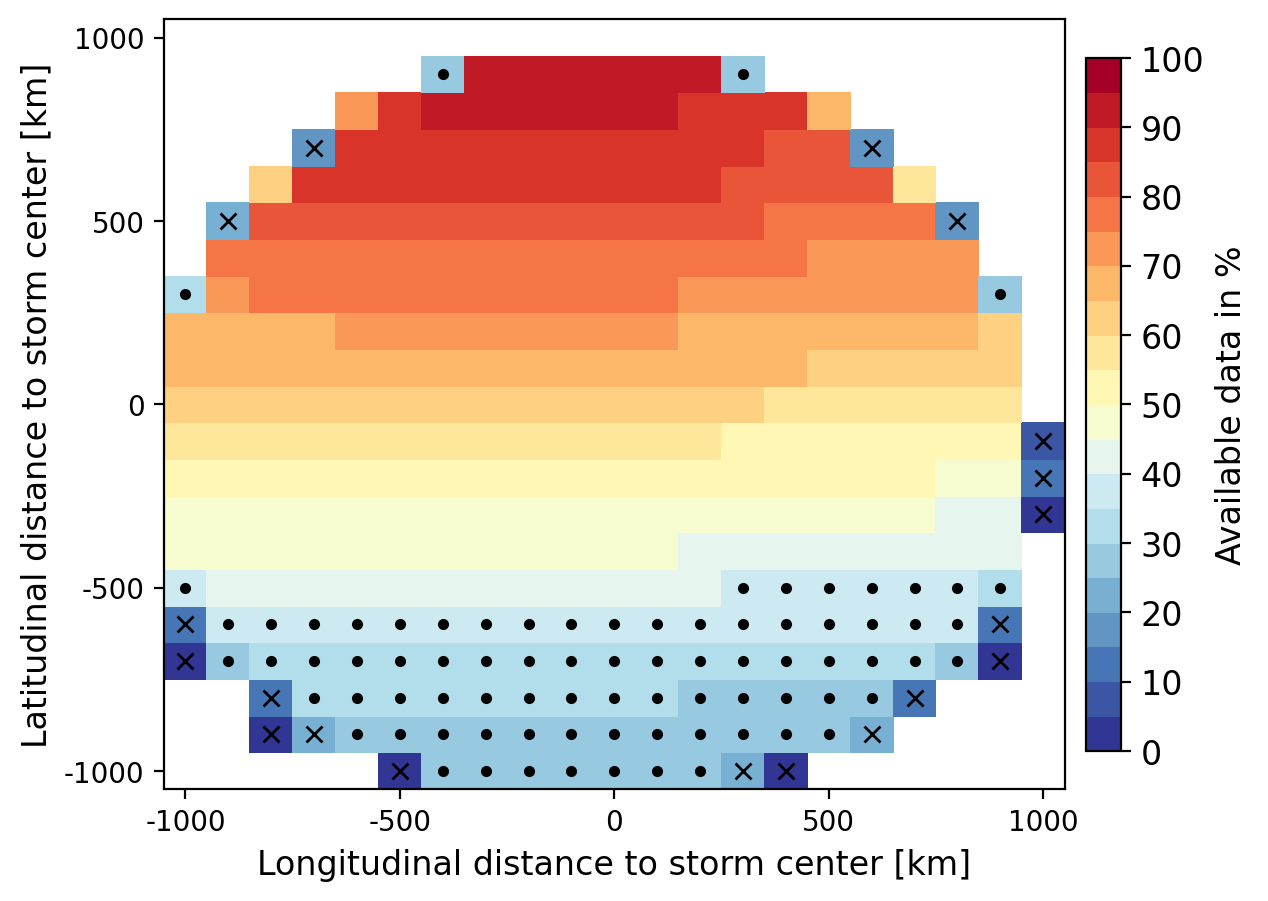

/tmp/ipykernel_1296869/1641089724.py:69: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


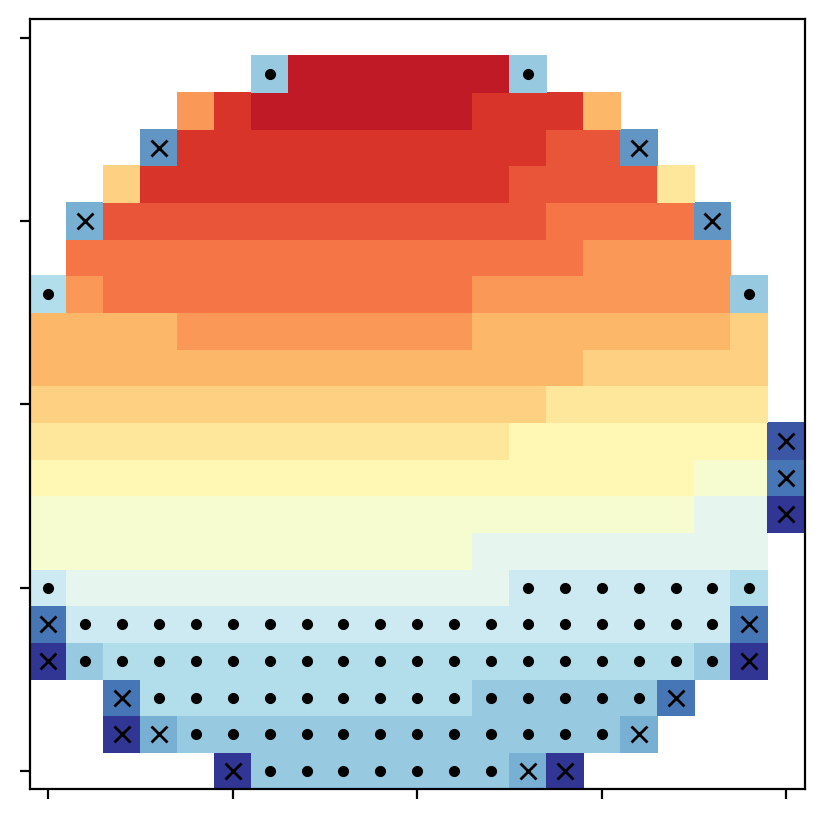

/tmp/ipykernel_1296869/1641089724.py:101: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


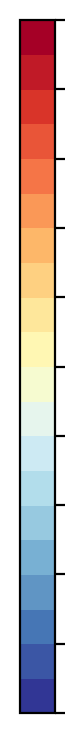

In [18]:
#---
# plot % data coverage for all storms (low res, full field)
#---
save_plots = True
plot_eps   = True

data_count_all     = np.nansum(data_count,axis=0)
data_count_all_rel = 100*data_count_all/np.nansum(data_count_max)
data_count_all_rel[data_count_all_rel==0] = np.nan

print(data_count_all.shape,np.nanmin(data_count_all),np.nanmax(data_count_all))
print(data_count_all_rel.shape,np.nanmin(data_count_all_rel),np.nanmax(data_count_all_rel))

#---
# plot
#---
import matplotlib as mpl
dpicnt = 200

cmap = plt.cm.RdYlBu_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0, 100, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cticks = np.arange(0,100+10,10)
cticks_empty = ['','','','','','','','','','','']

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
cbar.set_label('Available data in %',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  
# add stippling for locations with value below XX%
threshold1 = 25
for xx in range(0,len(xticks)):
    for yy in range(0,len(xticks)):
        if data_count_all_rel.transpose()[xx,yy]<=threshold1:
            ax.plot(yy+0.5,xx+0.5,'kx')
threshold2 = 40
for xx in range(0,len(xticks)):
    for yy in range(0,len(xticks)):
        if (data_count_all_rel.transpose()[xx,yy]<=threshold2) & (data_count_all_rel.transpose()[xx,yy]>threshold1):
            ax.plot(yy+0.5,xx+0.5,'k.')

ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)

if save_plots:
    dpicnt = 200
    filename = 'Data_coverage_full_field_LOW_RES_1997_2018_all_storms_dot_'+str(threshold1)+'perc_cross_'+str(threshold2)+'perc.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
        
plt.show()

if plot_eps:
    
    fig, ax = plt.subplots(1,1,figsize=(5,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    m1=ax.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
    threshold1 = 25
    for xx in range(0,len(xticks)):
        for yy in range(0,len(xticks)):
            if data_count_all_rel.transpose()[xx,yy]<=threshold1:
                ax.plot(yy+0.5,xx+0.5,'kx')
    threshold2 = 40
    for xx in range(0,len(xticks)):
        for yy in range(0,len(xticks)):
            if (data_count_all_rel.transpose()[xx,yy]<=threshold2) & (data_count_all_rel.transpose()[xx,yy]>threshold1):
                ax.plot(yy+0.5,xx+0.5,'k.')

    ax.set_xticks(xticks[0::5])
    ax.set_yticks(xticks[0::5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if save_plots:
        dpicnt = 200
        filename = 'Data_coverage_full_field_LOW_RES_1997_2018_all_storms_dot_'+\
            str(threshold1)+'perc_cross_'+str(threshold2)+'perc.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)

    plt.show()
    
    # COLORBAR only
    fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    m1=ax.pcolor(data_count_all_rel.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
    plt.gca().set_visible(False)
    cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
    cbar.ax.tick_params(labelsize=fs)  
    cbar.ax.set_yticklabels(cticks_empty) 
    if save_plots:
        dpicnt = 200
        filename = 'Data_coverage_full_field_LOW_RES_1997_2018_all_storms_dot_'+\
            str(threshold1)+'perc_cross_'+str(threshold2)+'perc_colorbar.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)

    plt.show()



(21, 21) 0.0 40923.0
(21, 21) 0.0022594784 92.46464


/tmp/ipykernel_1296869/739499283.py:33: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel_hr.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


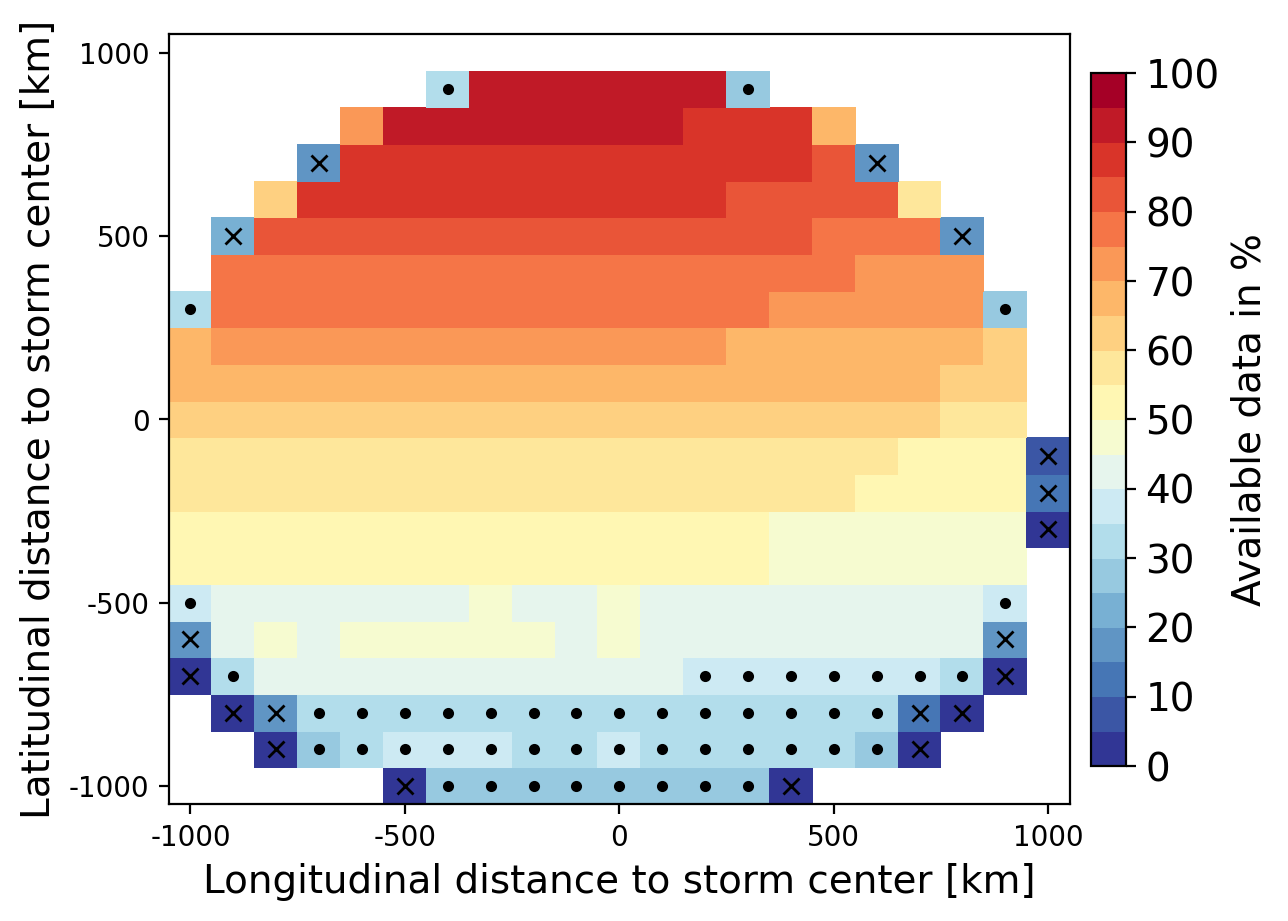

/tmp/ipykernel_1296869/739499283.py:68: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel_hr.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


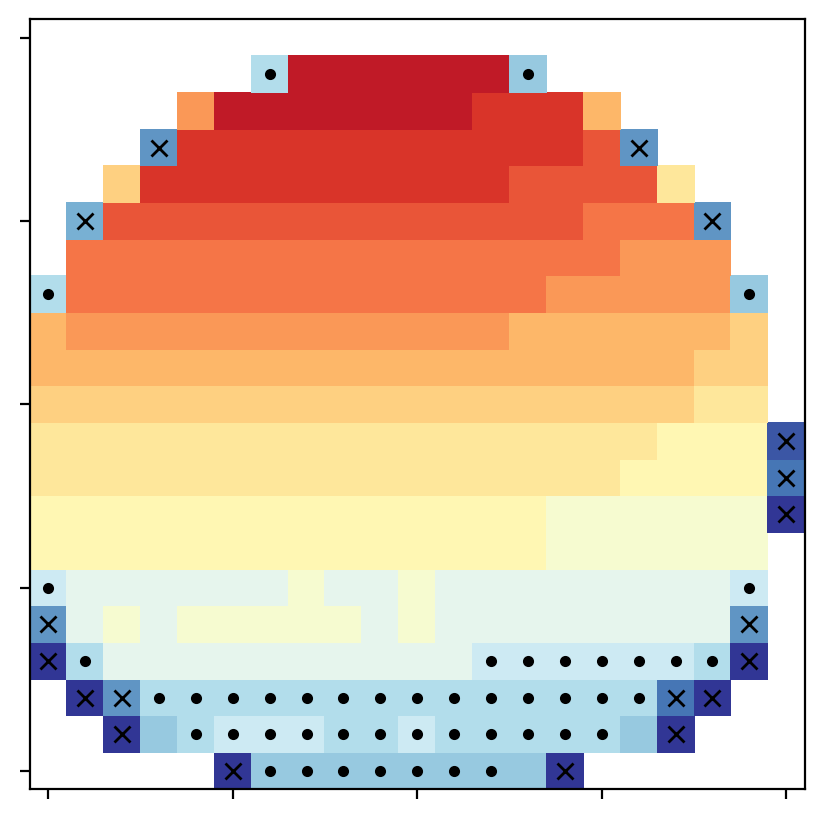

/tmp/ipykernel_1296869/739499283.py:95: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel_hr.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


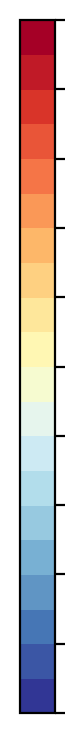

In [25]:
#---
# plot % data coverage for all storms (high res, full field)
#---
save_plots = True

data_count_all_hr     = np.nansum(data_count_hr,axis=0)
data_count_all_rel_hr = 100*data_count_all_hr/np.nansum(data_count_max_hr)
data_count_all_rel_hr[data_count_all_rel_hr==0] = np.nan

print(data_count_all_hr.shape,np.nanmin(data_count_all_hr),np.nanmax(data_count_all_hr))
print(data_count_all_rel_hr.shape,np.nanmin(data_count_all_rel_hr),np.nanmax(data_count_all_rel_hr))

#---
# plot
#---
import matplotlib as mpl

cmap = plt.cm.RdYlBu_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0, 100, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cticks = np.arange(0,100+10,10)
cticks_empty = ['','','','','','','','','','','']

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor(data_count_all_rel_hr.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
cbar.set_label('Available data in %',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  
# add stippling for locations with value below XX%
threshold1 = 25
for xx in range(0,len(xticks)):
    for yy in range(0,len(xticks)):
        if data_count_all_rel_hr.transpose()[xx,yy]<=threshold1:
            ax.plot(yy+0.5,xx+0.5,'kx')
threshold2 = 40
for xx in range(0,len(xticks)):
    for yy in range(0,len(xticks)):
        if (data_count_all_rel_hr.transpose()[xx,yy]<=threshold2) & (data_count_all_rel_hr.transpose()[xx,yy]>threshold1):
            ax.plot(yy+0.5,xx+0.5,'k.')

ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)

if save_plots:
    dpicnt = 200
    filename = 'Data_coverage_full_field_HIGH_RES_1997_2018_all_storms_dot_'+str(threshold1)+'perc_cross_'+str(threshold2)+'perc.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
        
plt.show()


if plot_eps:
    
    fig, ax = plt.subplots(1,1,figsize=(5,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    m1=ax.pcolor(data_count_all_rel_hr.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
    threshold1 = 25
    for xx in range(0,len(xticks)):
        for yy in range(0,len(xticks)):
            if data_count_all_rel_hr.transpose()[xx,yy]<=threshold1:
                ax.plot(yy+0.5,xx+0.5,'kx')
    threshold2 = 40
    for xx in range(0,len(xticks)):
        for yy in range(0,len(xticks)):
            if (data_count_all_rel_hr.transpose()[xx,yy]<=threshold2) & (data_count_all_rel.transpose()[xx,yy]>threshold1):
                ax.plot(yy+0.5,xx+0.5,'k.')

    ax.set_xticks(xticks[0::5])
    ax.set_yticks(xticks[0::5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if save_plots:
        dpicnt = 200
        filename = 'Data_coverage_full_field_HIGH_RES_1997_2018_all_storms_dot_'+\
            str(threshold1)+'perc_cross_'+str(threshold2)+'perc.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)

    plt.show()
    
    # COLORBAR only
    fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    m1=ax.pcolor(data_count_all_rel_hr.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
    plt.gca().set_visible(False)
    cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
    cbar.ax.tick_params(labelsize=fs)  
    cbar.ax.set_yticklabels(cticks_empty) 
    if save_plots:
        dpicnt = 200
        filename = 'Data_coverage_full_field_HIGH_RES_1997_2018_all_storms_dot_'+\
            str(threshold1)+'perc_cross_'+str(threshold2)+'perc_colorbar.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)

    plt.show()
    

In [ ]:
#---
# plot % data coverage for all storms (low res, full field), REVERSE --> DUE TO SEA ICE AND LAND
#---
save_plots = True

data_count_all     = np.nansum(data_count,axis=0)
data_count_all_rel = 100*data_count_all/np.nansum(data_count_max)
data_count_all_rel[data_count_all_rel==0] = np.nan

# any deviation from full data coverage is due to sea ice and land
data_count_all_rel = 100-data_count_all_rel

print(data_count_all.shape,np.nanmin(data_count_all),np.nanmax(data_count_all))
print(data_count_all_rel.shape,np.nanmin(data_count_all_rel),np.nanmax(data_count_all_rel))

#---
# plot
#---
import matplotlib as mpl
dpicnt = 200

cmap = plt.cm.RdYlBu_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0, 100, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cticks = np.arange(0,100+10,10)

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor((data_count_all_rel).transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
cbar.set_label('Missing data in % due to sea ice and land',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  
# add stippling for locations with value below XX%
#threshold1 = 25
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if data_count_all_rel.transpose()[xx,yy]<=threshold1:
#            ax.plot(yy+0.5,xx+0.5,'kx')
#threshold2 = 40
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if (data_count_all_rel.transpose()[xx,yy]<=threshold2) & (data_count_all_rel.transpose()[xx,yy]>threshold1):
#            ax.plot(yy+0.5,xx+0.5,'k.')

ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)

if save_plots:
    dpicnt = 200
    filename = 'Missing_data_due_to_land_seaice_full_field_LOW_RES_1997_2018_all_storms.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
        
plt.show()



In [ ]:
#---
# plot % data coverage for all storms (high res, full field), REVERSE --> DUE TO SEA ICE AND LAND
#---
save_plots = True

data_count_all_hr     = np.nansum(data_count_hr,axis=0)
data_count_all_rel_hr = 100*data_count_all_hr/np.nansum(data_count_max_hr)
data_count_all_rel_hr[data_count_all_rel_hr==0] = np.nan

# any deviation from full data coverage is due to sea ice and land
data_count_all_rel_hr = 100-data_count_all_rel_hr

print(data_count_all_hr.shape,np.nanmin(data_count_all_hr),np.nanmax(data_count_all_hr))
print(data_count_all_rel_hr.shape,np.nanmin(data_count_all_rel_hr),np.nanmax(data_count_all_rel_hr))

#---
# plot
#---
import matplotlib as mpl

cmap = plt.cm.RdYlBu_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0, 100, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cticks = np.arange(0,100+10,10)

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor((data_count_all_rel_hr.transpose()),vmin=0,vmax=100,cmap=cmap,norm=norm)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
cbar.set_label('Missing data in % due to sea ice and land',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  
# add stippling for locations with value below XX%
#threshold1 = 25
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if data_count_all_rel_hr.transpose()[xx,yy]<=threshold1:
#            ax.plot(yy+0.5,xx+0.5,'kx')
#threshold2 = 40
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if (data_count_all_rel_hr.transpose()[xx,yy]<=threshold2) & (data_count_all_rel_hr.transpose()[xx,yy]>threshold1):
#            ax.plot(yy+0.5,xx+0.5,'k.')

ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)

if save_plots:
    dpicnt = 200
    filename = 'Missing_data_due_to_land_seaice_full_field_HIGH_RES_1997_2018_all_storms.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
        
plt.show()


In [ ]:
#---
# plot: high res minus low res
#---
import matplotlib as mpl


data_count_all     = np.nansum(data_count,axis=0)
data_count_all_rel = 100*data_count_all/np.nansum(data_count_max)
data_count_all_rel[data_count_all_rel==0] = np.nan

data_count_all_hr     = np.nansum(data_count_hr,axis=0)
data_count_all_rel_hr = 100*data_count_all_hr/np.nansum(data_count_max_hr)
data_count_all_rel_hr[data_count_all_rel_hr==0] = np.nan


vmin = 0
vmax = 5

print('Min:',np.nanmin(data_count_all_rel_hr.transpose()-data_count_all_rel.transpose()))
print('Max:',np.nanmax(data_count_all_rel_hr.transpose()-data_count_all_rel.transpose()))

cmap = plt.cm.Reds #Blues_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin, vmax, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#cticks = [-5,-4,-3,-2,-1,0] #np.arange(vmin,vmax+5,5)
cticks = [0,1,2,3,4,5] #np.arange(vmin,vmax+5,5)

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor(data_count_all_rel_hr.transpose()-data_count_all_rel.transpose(),vmin=vmin,vmax=vmax,cmap=cmap,norm=norm)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
cbar.set_label('$\Delta$ Available data in %',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  

ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)
ax.annotate('HIGH RES - LOW RES\n(full field)',xy=(0.98,0.91),\
                xycoords='axes fraction',fontsize=fs-2,ha='right',color='k',zorder=120) #,fontweight='bold'

# add stippling for locations with value below XX%
threshold1 = 25
for xx in range(0,len(xticks)):
    for yy in range(0,len(xticks)):
        if data_count_all_rel.transpose()[xx,yy]<=threshold1:
            ax.plot(yy+0.5,xx+0.5,'kx')
threshold2 = 40
for xx in range(0,len(xticks)):
    for yy in range(0,len(xticks)):
        if (data_count_all_rel.transpose()[xx,yy]<=threshold2) & (data_count_all_rel.transpose()[xx,yy]>threshold1):
            ax.plot(yy+0.5,xx+0.5,'k.')
            
if save_plots:
    dpicnt = 200
    filename = 'Data_coverage_HIGH_RES_minus_LOW_RES_full_field_1997_2018_all_storms_dot_'+\
                    str(threshold1)+'perc_cross_'+str(threshold2)+'perc.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
        
plt.show()


(21, 21) 0.0 2632.0
(21, 21) 0.0067784353 5.9469476
Max: 5.9469476


/tmp/ipykernel_1296869/465948935.py:39: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel_em.transpose(),vmin=0,vmax=vmax,cmap=cmap,norm=norm)


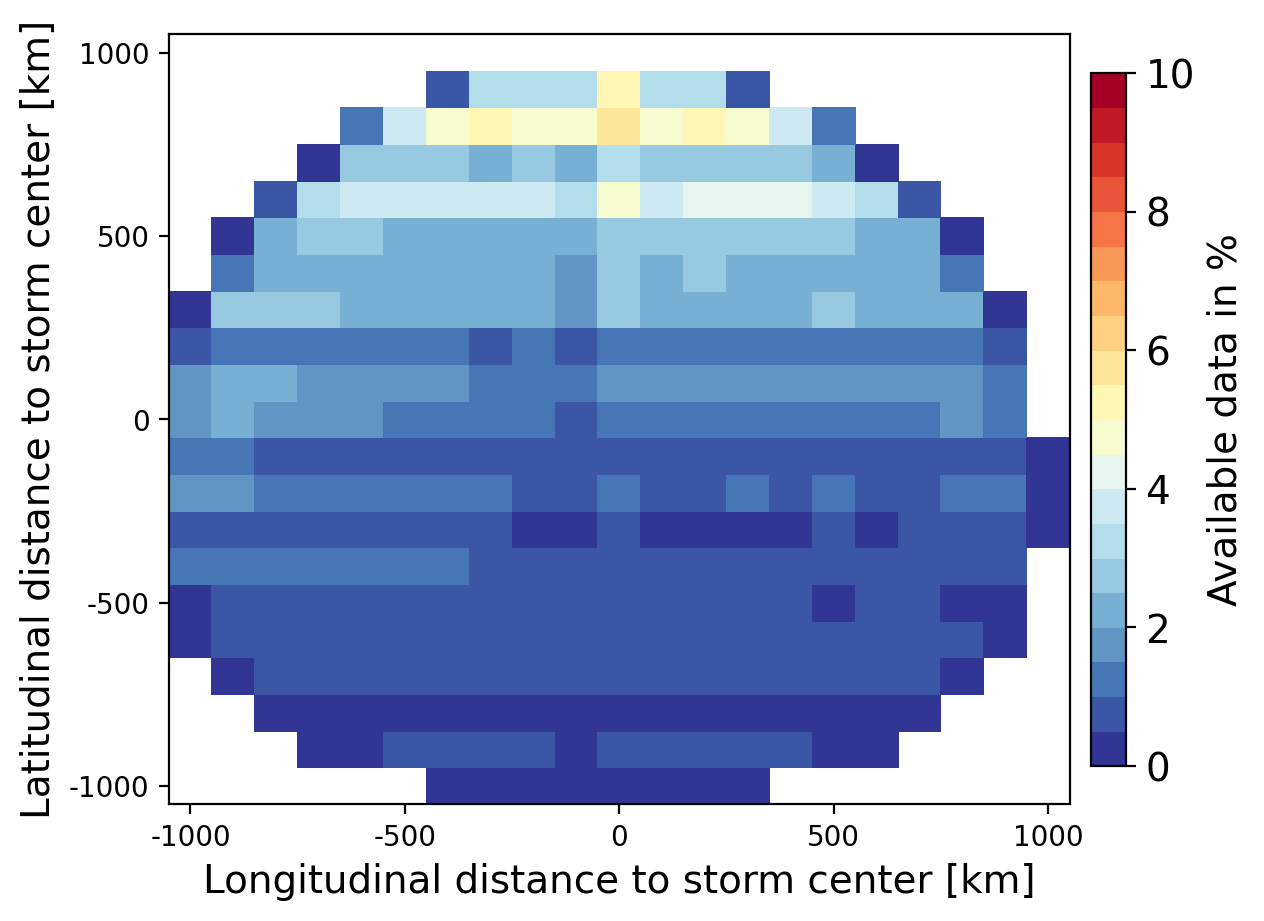

/tmp/ipykernel_1296869/465948935.py:77: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel_em.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


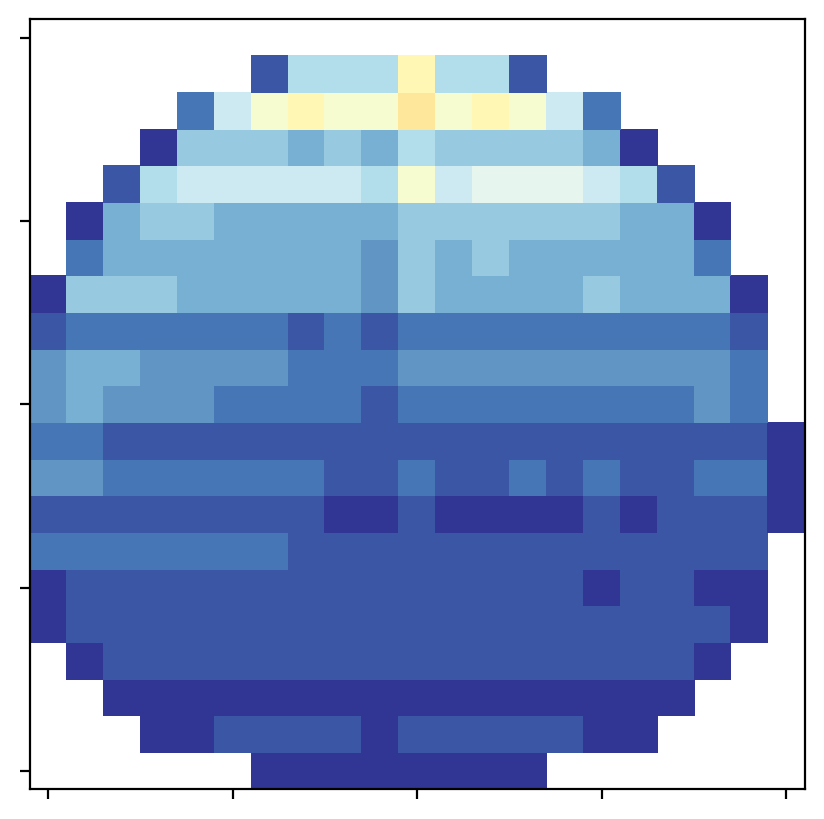

/tmp/ipykernel_1296869/465948935.py:93: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  m1=ax.pcolor(data_count_all_rel_em.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)


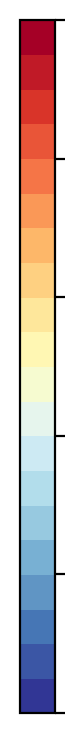

In [26]:
# do the same for the emulator data!

#---
# plot % data coverage for all storms
#---
save_plots = True

data_count_all_em     = np.nansum(data_count_em,axis=0)
data_count_all_rel_em = 100*data_count_all_em/np.nansum(data_count_max_em)
data_count_all_rel_em[data_count_all_rel_em==0] = np.nan

print(data_count_all_em.shape,np.nanmin(data_count_all_em),np.nanmax(data_count_all_em))
print(data_count_all_rel_em.shape,np.nanmin(data_count_all_rel_em),np.nanmax(data_count_all_rel_em))

#---
# plot
#---
import matplotlib as mpl

vmax = 10

cmap = plt.cm.RdYlBu_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0, vmax, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cticks = np.arange(0,vmax+2,2)
cticks_empty = ['','','','','','']

print('Max:',np.nanmax(data_count_all_rel_em))

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor(data_count_all_rel_em.transpose(),vmin=0,vmax=vmax,cmap=cmap,norm=norm)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
cbar.set_label('Available data in %',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  

## add stippling for locations with value below XX%
#threshold1 = 20
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if data_count_all_rel.transpose()[xx,yy]<=threshold1:
#            ax.plot(yy+0.5,xx+0.5,'kx')
#threshold2 = 40
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if (data_count_all_rel.transpose()[xx,yy]<=threshold2) & (data_count_all_rel.transpose()[xx,yy]>threshold1):
#            ax.plot(yy+0.5,xx+0.5,'k.')

ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)

if save_plots:
    dpicnt = 200
    #filename = 'Data_coverage_emulator_1997_2018_all_storms.png'
    filename = 'Data_coverage_emulator_1997_2018_all_storms_dot_'+str(threshold1)+\
            'perc_cross_'+str(threshold2)+'perc_full_field_clim.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
        
plt.show()


if plot_eps:
    
    fig, ax = plt.subplots(1,1,figsize=(5,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    m1=ax.pcolor(data_count_all_rel_em.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
    ax.set_xticks(xticks[0::5])
    ax.set_yticks(xticks[0::5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if save_plots:
        dpicnt = 200
        filename = 'Data_coverage_emulator_1997_2018_all_storms_dot_'+\
            str(threshold1)+'perc_cross_'+str(threshold2)+'perc.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)

    plt.show()
    
    # COLORBAR only
    fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
    m1=ax.pcolor(data_count_all_rel_em.transpose(),vmin=0,vmax=100,cmap=cmap,norm=norm)
    plt.gca().set_visible(False)
    cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
    cbar.ax.tick_params(labelsize=fs)  
    cbar.ax.set_yticklabels(cticks_empty) 
    if save_plots:
        dpicnt = 200
        filename = 'Data_coverage_emulator_1997_2018_all_storms_dot_'+\
            str(threshold1)+'perc_cross_'+str(threshold2)+'perc_colorbar.eps'
        plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')#,transparent=True)

    plt.show()


In [ ]:
#---
# plot: low res, full field minus emulator
#---
import matplotlib as mpl

vmin = -75 #0
vmax = 0 #75

print('Min:',np.nanmin(data_count_all_rel_em.transpose()-data_count_all_rel.transpose()))
print('Max:',np.nanmax(data_count_all_rel_em.transpose()-data_count_all_rel.transpose()))

cmap = plt.cm.Blues_r  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin, vmax, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cticks = [-70,-60,-50,-40,-30,-20,-10,0] #np.arange(vmin,vmax+5,5)
#cticks = [70,60,50,40,30,20,10,0] #np.arange(vmin,vmax+5,5)

fig, ax = plt.subplots(1,1,figsize=(7,5), dpi=dpicnt,\
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [1]})
m1=ax.pcolor((data_count_all_rel_em.transpose()-data_count_all_rel.transpose()),vmin=vmin,vmax=vmax,cmap=cmap,norm=norm)
cbar=plt.colorbar(m1,ax=ax,orientation='vertical',shrink=0.9,pad=0.02,ticks=cticks)
#cbar.set_label('Missing data in % due to clouds\nand low solar zenith angle',fontsize=fs)
cbar.set_label('$\Delta$ Available data in %',fontsize=fs)
cbar.ax.tick_params(labelsize=fs)  

ax.set_xticks(xticks[0::5])
ax.set_yticks(xticks[0::5])
ax.set_xticklabels(x_bins[0::5])
ax.set_yticklabels(y_bins[0::5])
ax.set_ylabel(ylabel_string,fontsize=fs)
ax.set_xlabel(xlabel_string,fontsize=fs)
ax.annotate('emulator - full field',xy=(0.98,0.95),\
                xycoords='axes fraction',fontsize=fs-2,ha='right',color='k',zorder=120) #,fontweight='bold'

# add stippling for locations with value below XX%
#threshold1 = 25
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if data_count_all_rel.transpose()[xx,yy]<=threshold1:
#            ax.plot(yy+0.5,xx+0.5,'kx')
#threshold2 = 40
#for xx in range(0,len(xticks)):
#    for yy in range(0,len(xticks)):
#        if (data_count_all_rel.transpose()[xx,yy]<=threshold2) & (data_count_all_rel.transpose()[xx,yy]>threshold1):
#            ax.plot(yy+0.5,xx+0.5,'k.')
            
if save_plots:
    dpicnt = 200
    #filename = 'Missing_data_due_to_coulds_low_solar_zenith_angle_emulator_'+\
    #                    'full_field_clim_minus_full_field_1997_2018_all_storms.png'
    filename = 'Data_coverage_emulator_full_field_clim_minus_full_field_1997_2018_all_storms_dot_'+\
                    str(threshold1)+'perc_cross_'+str(threshold2)+'perc.png'
    plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight',format='png')#,transparent=True)
        
plt.show()


In [ ]:
#print(data_count_all_rel_hr.transpose()-data_count_all_rel.transpose())

In [ ]:
#----
# OLD way of reading in the info (one file per year)
#----
# NOTE: this way of doing it has duplicate storms! (num_storms is > 9618)

old_code = False
if old_code: 
    #---
    # get the numbers for each month, LOW RES FULL FIELD
    #---

    dist_threshold = 1000
    years = np.arange(1997,2018+1,1)
    path1 = '/global/cfs/cdirs/m4003/cnissen/CESM_anomalies_STORM_PAPER_subtract_clim_first/count_obs_in_anomalies/'

    count_storms = 0
    for yy in tqdm(range(0,len(years))):
        file1 = 'Composite_anomalies_within_'+str(dist_threshold)+'km_of_storm_center_at_noon'+\
                                           '_'+str(years[yy])+'-01-01_subtract_clim_first_COUNT_OBS.nc'
        # anomaly of vari
        ff  = xr.open_dataset(path1+file1)
        aux_count       = ff['totChl_storm_anomaly4_count'].values 
        aux_count_max   = ff['totChl_storm_anomaly4_count_max'].values 
        month_storm     = ff['month_storm'].values  # at min. SLP
        days_storm      = ff['days_storm'].values 
        lon_storm       = ff['lon_storm'].values # at min. SLP
        lat_storm       = ff['lat_storm'].values # at min. SLP
        min_slp         = ff['min_min_slp_storm'].values # Minimum sea level pressure during the existence of each storm (based on min. SLP at noon)
        ff.close()
        count_storms = count_storms+month_storm.shape[0]

        if yy==0:
            # full composites
            data_count = aux_count
            data_count_jan = aux_count[np.where(month_storm==1)[0]]
            data_count_feb = aux_count[np.where(month_storm==2)[0]]
            data_count_mar = aux_count[np.where(month_storm==3)[0]]
            data_count_apr = aux_count[np.where(month_storm==4)[0]]
            data_count_may = aux_count[np.where(month_storm==5)[0]]
            data_count_jun = aux_count[np.where(month_storm==6)[0]]
            data_count_jul = aux_count[np.where(month_storm==7)[0]]
            data_count_aug = aux_count[np.where(month_storm==8)[0]]
            data_count_sep = aux_count[np.where(month_storm==9)[0]]
            data_count_oct = aux_count[np.where(month_storm==10)[0]]
            data_count_nov = aux_count[np.where(month_storm==11)[0]]
            data_count_dec = aux_count[np.where(month_storm==12)[0]]
            # max number of obs
            data_count_max = aux_count_max
            data_count_max_jan = aux_count_max[np.where(month_storm==1)[0]]
            data_count_max_feb = aux_count_max[np.where(month_storm==2)[0]]
            data_count_max_mar = aux_count_max[np.where(month_storm==3)[0]]
            data_count_max_apr = aux_count_max[np.where(month_storm==4)[0]]
            data_count_max_may = aux_count_max[np.where(month_storm==5)[0]]
            data_count_max_jun = aux_count_max[np.where(month_storm==6)[0]]
            data_count_max_jul = aux_count_max[np.where(month_storm==7)[0]]
            data_count_max_aug = aux_count_max[np.where(month_storm==8)[0]]
            data_count_max_sep = aux_count_max[np.where(month_storm==9)[0]]
            data_count_max_oct = aux_count_max[np.where(month_storm==10)[0]]
            data_count_max_nov = aux_count_max[np.where(month_storm==11)[0]]
            data_count_max_dec = aux_count_max[np.where(month_storm==12)[0]]
        else:
            # full composites
            data_count     = np.concatenate((data_count,aux_count))
            data_count_jan = np.concatenate((data_count_jan,aux_count[np.where(month_storm==1)[0]]))
            data_count_feb = np.concatenate((data_count_feb,aux_count[np.where(month_storm==2)[0]]))
            data_count_mar = np.concatenate((data_count_mar,aux_count[np.where(month_storm==3)[0]]))
            data_count_apr = np.concatenate((data_count_apr,aux_count[np.where(month_storm==4)[0]]))
            data_count_may = np.concatenate((data_count_may,aux_count[np.where(month_storm==5)[0]]))
            data_count_jun = np.concatenate((data_count_jun,aux_count[np.where(month_storm==6)[0]]))
            data_count_jul = np.concatenate((data_count_jul,aux_count[np.where(month_storm==7)[0]]))
            data_count_aug = np.concatenate((data_count_aug,aux_count[np.where(month_storm==8)[0]]))
            data_count_sep = np.concatenate((data_count_sep,aux_count[np.where(month_storm==9)[0]]))
            data_count_oct = np.concatenate((data_count_oct,aux_count[np.where(month_storm==10)[0]]))
            data_count_nov = np.concatenate((data_count_nov,aux_count[np.where(month_storm==11)[0]]))
            data_count_dec = np.concatenate((data_count_dec,aux_count[np.where(month_storm==12)[0]]))
            # max number of obs
            data_count_max = np.concatenate((data_count_max,aux_count_max))
            data_count_max_jan = np.concatenate((data_count_max_jan,aux_count_max[np.where(month_storm==1)[0]]))
            data_count_max_feb = np.concatenate((data_count_max_feb,aux_count_max[np.where(month_storm==2)[0]]))
            data_count_max_mar = np.concatenate((data_count_max_mar,aux_count_max[np.where(month_storm==3)[0]]))
            data_count_max_apr = np.concatenate((data_count_max_apr,aux_count_max[np.where(month_storm==4)[0]]))
            data_count_max_may = np.concatenate((data_count_max_may,aux_count_max[np.where(month_storm==5)[0]]))
            data_count_max_jun = np.concatenate((data_count_max_jun,aux_count_max[np.where(month_storm==6)[0]]))
            data_count_max_jul = np.concatenate((data_count_max_jul,aux_count_max[np.where(month_storm==7)[0]]))
            data_count_max_aug = np.concatenate((data_count_max_aug,aux_count_max[np.where(month_storm==8)[0]]))
            data_count_max_sep = np.concatenate((data_count_max_sep,aux_count_max[np.where(month_storm==9)[0]]))
            data_count_max_oct = np.concatenate((data_count_max_oct,aux_count_max[np.where(month_storm==10)[0]]))
            data_count_max_nov = np.concatenate((data_count_max_nov,aux_count_max[np.where(month_storm==11)[0]]))
            data_count_max_dec = np.concatenate((data_count_max_dec,aux_count_max[np.where(month_storm==12)[0]]))


        del aux_count,aux_count_max

    print('count_storms',count_storms)
    print('ALL STORMS:',data_count.shape,data_count_max.shape)
    print()
    print('Jan:',data_count_jan.shape,data_count_max_jan.shape)
    print('Feb:',data_count_feb.shape,data_count_max_feb.shape)
    print('Mar:',data_count_mar.shape,data_count_max_mar.shape)
    print('Apr:',data_count_apr.shape,data_count_max_apr.shape)
    print('May:',data_count_may.shape,data_count_max_may.shape)
    print('Jun:',data_count_jun.shape,data_count_max_jun.shape)
    print('Jul:',data_count_jul.shape,data_count_max_jul.shape)
    print('Aug:',data_count_aug.shape,data_count_max_aug.shape)
    print('Sep:',data_count_sep.shape,data_count_max_sep.shape)
    print('Oct:',data_count_oct.shape,data_count_max_oct.shape)
    print('Nov:',data_count_nov.shape,data_count_max_nov.shape)
    print('Dec:',data_count_dec.shape,data_count_max_dec.shape)

